<a href="https://colab.research.google.com/github/Mohamed-Adel-l/Deep-Learning/blob/main/RBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import MinMaxScaler

Load Fashion MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Sample Images

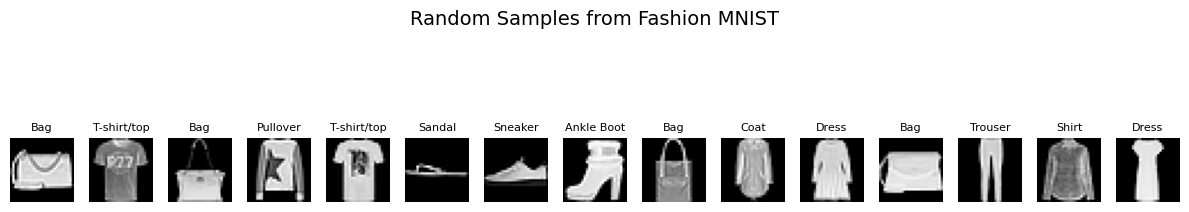

In [ ]:
import random
import matplotlib.pyplot as plt
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

random_indices = random.sample(range(x_train.shape[0]), 15)
plt.figure(figsize=(12, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 15, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_labels[y_train[idx]], fontsize=8)
    plt.axis('off')

plt.suptitle("Random Samples from Fashion MNIST", fontsize=14)
plt.tight_layout()
plt.show()

Preprocess

In [ ]:
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

Build and Train RBM

In [ ]:
n_hidden = 256
rbm = BernoulliRBM(n_components=n_hidden, learning_rate=0.06, batch_size=64, n_iter=20, random_state=42)
x_train_bin = (x_train_flat > 0.5).astype(np.float32)
x_test_bin = (x_test_flat > 0.5).astype(np.float32)
rbm.fit(x_train_bin)
x_train_rbm = rbm.transform(x_train_bin)
x_test_rbm = rbm.transform(x_test_bin)

Build &Train MLP using the hidden features from RBM

In [ ]:
rbm_mlp = Sequential([
    Input(shape=(n_hidden,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
rbm_mlp.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rbm_mlp.fit(x_train_rbm, y_train, epochs=10, batch_size=128, validation_split=0.1)
rbm_loss, rbm_acc = rbm_mlp.evaluate(x_test_rbm, y_test, verbose=0)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6691 - loss: 1.0440 - val_accuracy: 0.8118 - val_loss: 0.5060
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8092 - loss: 0.5099 - val_accuracy: 0.8122 - val_loss: 0.4818
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8263 - loss: 0.4661 - val_accuracy: 0.8303 - val_loss: 0.4582
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8245 - loss: 0.4637 - val_accuracy: 0.8357 - val_loss: 0.4468
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8308 - loss: 0.4493 - val_accuracy: 0.8370 - val_loss: 0.4399
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8304 - loss: 0.4423 - val_accuracy: 0.8340 - val_loss: 0.4434
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8374 - loss: 0.4314 - val_accuracy: 0.8390 - val_loss: 0.4385
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8380 - loss: 0.4300 - val_accuracy: 0.

Train MLP on Raw Image Pixels

In [ ]:
raw_mlp = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
raw_mlp.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
raw_mlp.fit(x_train_flat, y_train, epochs=10, batch_size=128, validation_split=0.1)
raw_loss, raw_acc = raw_mlp.evaluate(x_test_flat, y_test, verbose=0)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6660 - loss: 12.0352 - val_accuracy: 0.7800 - val_loss: 1.0943
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7905 - loss: 0.9726 - val_accuracy: 0.8073 - val_loss: 0.7052
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8082 - loss: 0.6461 - val_accuracy: 0.8262 - val_loss: 0.6076
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8289 - loss: 0.5417 - val_accuracy: 0.8260 - val_loss: 0.6032
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8465 - loss: 0.4539 - val_accuracy: 0.8347 - val_loss: 0.5292
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8504 - loss: 0.4357 - val_accuracy: 0.8235 - val_loss: 0.5444
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8555 - loss: 0.4117 - val_accuracy: 0.8367 - val_loss: 0.4852
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8598 - loss: 0.3828 - val_accuracy: 0

Comparison Of Evaluation Metrics

In [ ]:
from tabulate import tabulate
results_table = [
    ["RBM + MLP", rbm_acc, rbm_loss],
    ["MLP on Raw Data", raw_acc, raw_loss]
]
headers = ["Model", "Accuracy", "Loss"]
print(tabulate(results_table, headers=headers, tablefmt="fancy_grid"))


╒═════════════════╤════════════╤══════════╕
│ Model           │   Accuracy │     Loss │
╞═════════════════╪════════════╪══════════╡
│ RBM + MLP       │     0.8281 │ 0.453745 │
├─────────────────┼────────────┼──────────┤
│ MLP on Raw Data │     0.8436 │ 0.48034  │
╘═════════════════╧════════════╧══════════╛


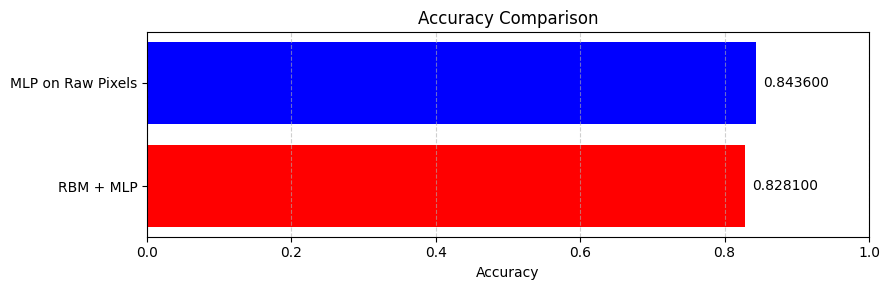

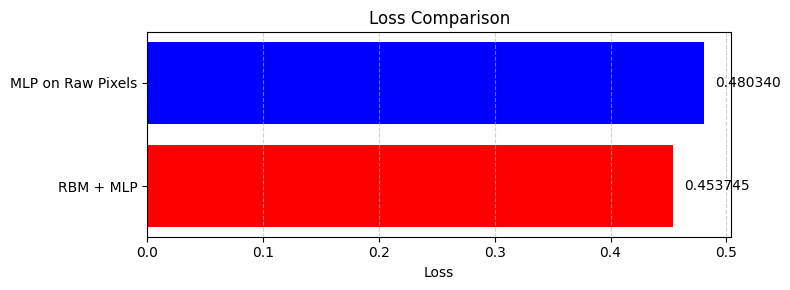

In [ ]:
models = ['RBM + MLP', 'MLP on Raw Pixels']
accuracy = [rbm_acc, raw_acc]
loss = [rbm_loss, raw_loss]

plt.figure(figsize=(9, 3))
plt.barh(models, accuracy, color=['red', 'blue'])
plt.title("Accuracy Comparison")
plt.xlabel("Accuracy")
plt.xlim(0, 1)
for i, v in enumerate(accuracy):
    plt.text(v + 0.01, i, f"{v:.6f}", va='center')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 3))
plt.barh(models, loss, color=['red', 'blue'])
plt.title("Loss Comparison")
plt.xlabel("Loss")
for i, v in enumerate(loss):
    plt.text(v + 0.01, i, f"{v:.6f}", va='center')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
